In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 425 (delta 103), reused 155 (delta 68), pack-reused 193
Receiving objects: 100% (425/425), 8.68 MiB | 15.14 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [2]:
!pip install wordcloud

# New Section

In [5]:
df = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep="\t", names = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.shape

(5572, 2)

##DATA CLEANING


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
sn = SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [25]:
def clean_text(sms):
  sms = sms.lower()
  sms = re.sub("[^a-z]",' ',sms)
  sms = nltk.word_tokenize(sms)
  sms =[t for t in sms if len(t)>1]
  sms =[sn.stem(word)for word in sms if word not in stop]
  sms = ' '.join(sms)
  return sms

In [26]:
clean_text("Get this stuff for free playing  ??// just Rs.10")

'get stuff free play rs'

In [30]:
df['clean_text'] = df['text'].apply(clean_text)

In [31]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


##Wordcloud


In [55]:
from wordcloud import WordCloud

In [48]:
hamdata = df[df['label'] == 'ham']
hamdata = hamdata['clean_text']

In [69]:
def wordcloud(data):
  words= ' '.join(data)
  wc = WordCloud(background_color='white')
  wc = wc.generate(words)

  plt.figure(figsize= (10,8))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

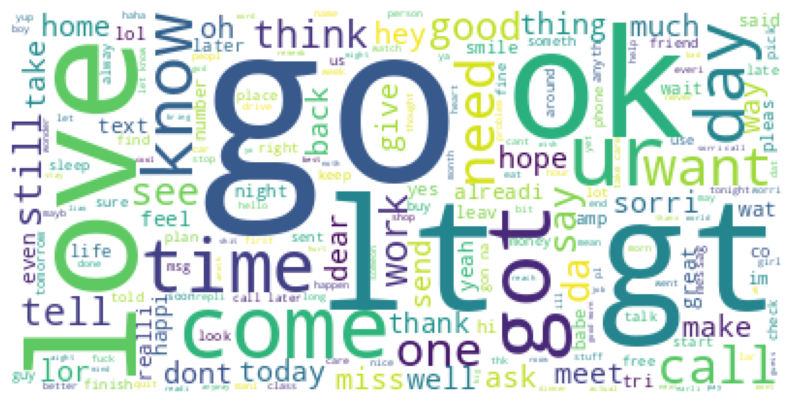

In [71]:
wordcloud(hamdata)

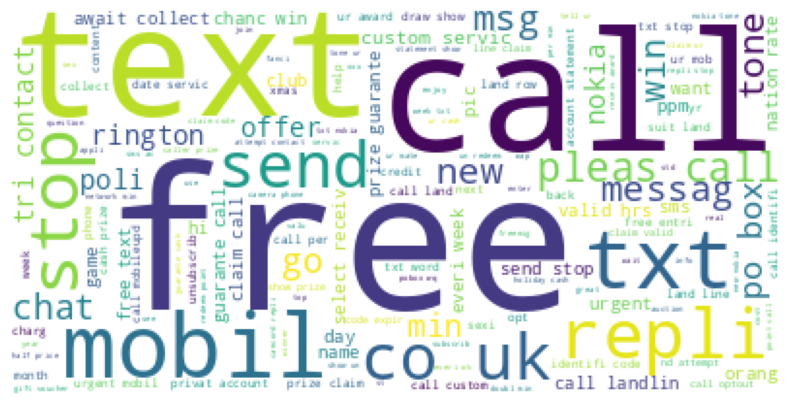

In [72]:

spamdata = df[df['label'] == 'spam']

spamdata = spamdata['clean_text']

wordcloud(spamdata)

##Featurization


In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
cv = CountVectorizer(max_features = 5000)

In [63]:
X = cv.fit_transform(df['clean_text']).toarray()

In [64]:
X.shape

(5572, 5000)

In [73]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [74]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

##Model Building


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [77]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_test,y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [81]:
X = cv.fit_transform(df['clean_text']).toarray()

In [84]:
pd.DataFrame({'Actual' : y_test, 'predicted': y_pred}).head(10)

,Actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


##Evaluation

In [80]:
print ("Accuracy on Training Data :")

print(model.score(X_train, y_train))

Accuracy on Training Data :
0.990892043932494


In [83]:
print ("Accuracy on Testing Data :")

print(model.score(X_test, y_test))

Accuracy on Testing Data :
0.9847743338771071
